<h3>Importing Data Cleaning and Merging it.</h3>

In [5]:
import pandas as pd

# Load the data
people_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\01_people.csv")
abilities_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\02_abilities.csv")
education_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\03_education.csv")
skills_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\06_skills.csv")
experience_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\04_experience.csv")
person_skill_df = pd.read_csv(r"C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\05_person_skills.csv")



<h3>Abilities CSV</h3>
<p>The Data is Structured like multiple repeated rows with skills of individual People. People are identified by Person_id(primary Key)
we will be keeping only first 5000 people for our project the dataset has like 50000+ people with thier data in it</p>

In [32]:
abilities_aggregated = abilities_df.groupby('person_id')['ability'].apply(lambda x: ', '.join(x)).reset_index()

# Save the aggregated data to a new CSV
abilities_aggregated = abilities_aggregated.head(4999)
abilities_aggregated.to_csv('02_abilities.csv', index=False)

<h3>People CSV</h3>
<p>we will be removing the unnecsary columns from this csv which are email, linkdein and phone which are at average 90% null and we dont need them in our project</p>

In [ ]:
columns_to_drop = ['email', 'phone', 'linkedin']
df_cleaned = people_df.drop(columns=columns_to_drop)

# Save the cleaned data to a new CSV file
df_cleaned = df_cleaned.head(5000)
df_cleaned.to_csv('01_people.csv', index=False)


print("Columns removed and cleaned file saved as '01_people_cleaned.csv'")

Columns removed and cleaned file saved as '01_people_cleaned.csv'


<h3>Education CSV</h3>
<p>There are 5 columns person_id, institution, program, start_date and location, we will be removing start_date and Location since we dont need them. we will also be joining multiple person_id's rows.</p>

In [34]:

# Merge the education data into one row per person_id, combining all institutions and programs
df_education_merged = education_df.groupby('person_id').agg({
    'institution': lambda x: ', '.join(x.dropna().unique()),  # Concatenate unique institutions
    'program': lambda x: ', '.join(x.dropna().unique()),      # Concatenate unique programs
}).reset_index()

df_education_merged = df_education_merged.head(5000)
# Save the cleaned and merged data to a new CSV file
df_education_merged.to_csv('03_education.csv', index=False)


print("Education data has been merged and cleaned.")


Education data has been merged and cleaned.


<h3>Experience CSV</h3>
<p>So this one needs more work than any other. we will first merge multiple person_id rows into 1, than we will calculate the years a person worked for, if missing we will add zero instead. </p>

In [ ]:
import pandas as pd
from datetime import datetime

# Ensure that 'title' and 'firm' columns are treated as strings
experience_df['title'] = experience_df['title'].fillna('').astype(str)
experience_df['firm'] = experience_df['firm'].fillna('').astype(str)

# Convert start_date and end_date to datetime, coercing any errors
experience_df['start_date'] = pd.to_datetime(experience_df['start_date'], errors='coerce')
experience_df['end_date'] = pd.to_datetime(experience_df['end_date'], errors='coerce')

# Fill missing end_date values with the current date
experience_df['end_date'].fillna(datetime.now(), inplace=True)

# Calculate the duration in years (difference between start and end date)
experience_df['duration_years'] = (experience_df['end_date'] - experience_df['start_date']).dt.days / 365.25

# Group by 'person_id' and aggregate data
df_experience_grouped = experience_df.groupby('person_id').agg({
    'title': ' '.join,  # Concatenate job titles for each person
    'firm': ' '.join,   # Concatenate firm names for each person
    'start_date': 'min',  # Keep earliest start date
    'end_date': 'max',    # Keep latest end date
    'duration_years': 'sum'  # Sum the durations for all jobs
}).reset_index()

# Save the cleaned and grouped experience data to a new CSV file
df_experience_grouped = df_experience_grouped.head(5000)
df_experience_grouped.to_csv('04_experience_grouped.csv', index=False)



In [ ]:
import pandas as pd
from datetime import datetime

# Load your 04_experience dataset
df = pd.read_csv('C:/Users/DELL/Desktop/Projects/DataScience/AI-powered-Resume-Builder-and-Reviewer/data/Preprocessing/04_experience_cleaned.csv')

# Fill missing end dates with today's date for entries with 0.0 duration
current_date = datetime.today().strftime('%Y-%m-%d')

# Replace empty or None End Dates with today's date
df['end_date'].fillna(current_date, inplace=True)

# Ensure the columns 'Start Date' and 'End Date' are in datetime format (removing time part)
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['end_date'] = pd.to_datetime(df['end_date']).dt.date

# Recalculate the duration for those entries that have missing or invalid end dates
df['Calculated Duration'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days / 365

# Optionally, update the duration for rows with original 0.0 duration values
df.loc[df['Calculated Duration'] == 0.0, 'Calculated Duration'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days / 365

# Handle NaN or infinite values in the 'Calculated Duration' column
df['Calculated Duration'].fillna(0, inplace=True)  # Replace NaN with 0 (or another default value)
df['Calculated Duration'] = df['Calculated Duration'].replace([float('inf'), -float('inf')], 0)  # Replace infinite values with 0

# Round the 'Calculated Duration' to the nearest whole number (years) and convert to integer
df['Calculated Duration'] = df['Calculated Duration'].round().astype(int)

# Drop the 'Start Date', 'End Date', and any other columns related to time
df.drop(columns=['start_date', 'end_date', 'duration_years'], inplace=True)

# Save the updated DataFrame back to a CSV file if necessary
df.to_csv('C:/Users/DELL/Desktop/Projects/DataScience/AI-powered-Resume-Builder-and-Reviewer/data/Preprocessing/04_experience.csv', index=False)


<h3>Person Skills CSV</h3>
<p>So this one needs more work than any other. we will first merge multiple person_id rows into 1, than we will calculate the years a person worked for, if missing we will add zero instead. </p>

In [9]:
person_skill_df['skill'] = person_skill_df['skill'].fillna('').astype(str)

# Group by 'person_id' and concatenate 'skills' for each person
person_skills_grouped = person_skill_df.groupby('person_id')['skill'].apply(lambda x: ', '.join(x)).reset_index()

# Save the merged DataFrame back to a CSV file
person_skills_grouped.to_csv('C:/Users/DELL/Desktop/Projects/DataScience/AI-powered-Resume-Builder-and-Reviewer/data/Preprocessing/05_person_skills.csv', index=False)

# Display the grouped DataFrame
print(person_skills_grouped)

       person_id                                              skill
0              1  Database administration, Database, Ms sql serv...
1              2  sql server management studio, visual studio, s...
2              3  DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...
3              4  Maintain multiple database environments (Redsh...
4              5  Scrum, Agile software development, Product bac...
...          ...                                                ...
54853      54929  Django, Angular JS, JavaScript, JQuery, Node.j...
54854      54930  Python, Django, AWS, AngularJS, Bootstrap, Jav...
54855      54931  Python 2.7, HTML5, CSS3, AJAX, JSON, JQuery, A...
54856      54932  Python 3.1x, PyQuery, PyQt, Django, Angular.js...
54857      54933  Analyzed and gathered business requirements, D...

[54858 rows x 2 columns]


In [14]:
import pandas as pd

# Load all the cleaned CSV files
people_df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\01_people.csv')
person_skills_df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\05_person_skills.csv')
education_df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\03_education.csv')
experience_df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\04_experience.csv')
abilities_df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\02_abilities.csv')

# Perform inner join on 'person_id' column to merge all data
merged_df = people_df.merge(person_skills_df, on='person_id', how='inner')
merged_df = merged_df.merge(education_df, on='person_id', how='inner')
merged_df = merged_df.merge(experience_df, on='person_id', how='inner')
merged_df = merged_df.merge(abilities_df, on='person_id', how='inner')

# Save the final merged DataFrame to a new CSV file (provide the full file path with .csv extension)
merged_df.to_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\final_merged_data.csv', index=False)

# Display the merged DataFrame
print(merged_df)


      person_id                                               name  \
0             1                             Database Administrator   
1             2                             Database Administrator   
2             3                      Oracle Database Administrator   
3             4  Amazon Redshift Administrator and ETL Develope...   
4             5             Scrum Master Scrum Master Scrum Master   
...         ...                                                ...   
4489       4994                               Front- End developer   
4490       4996                                   Sr. UI Developer   
4491       4998                                Freelance Developer   
4492       4999                         Senior Front End Developer   
4493       5000                      DEVELOPER DEVELOPER DEVELOPER   

                                                  skill  \
0     Database administration, Database, Ms sql serv...   
1     sql server management studio, visua

Total missing values before filling: 0
Total missing values after filling: 0


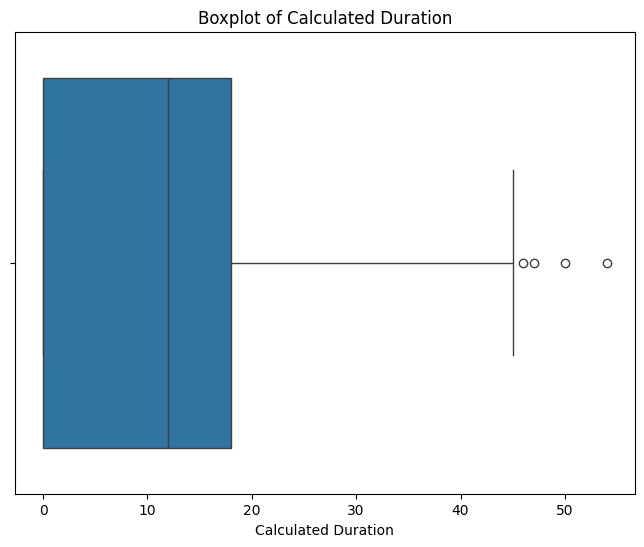

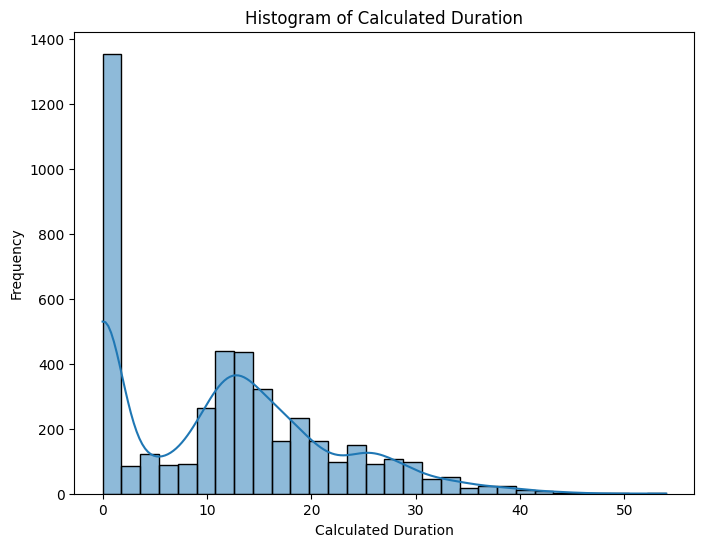

,person_id,name,skill,institution,program,title,firm,Calculated Duration,ability
0,1,Database Administrator,"Database administration, Database, Ms sql serv...",Lead City University,Bachelor of Science,Database Administrator Database Administrator,Family Private Care LLC Incomm,11,"Installation and Building Server, Running Back..."
1,2,Database Administrator,"sql server management studio, visual studio, s...",lagos state university,bsc in computer science,Database Administrator,Intercontinental Registry,3,"database management systems administration, de..."
2,3,Oracle Database Administrator,"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...","JNTU - Kakinada, Andhra Pradesh",Master of Computer Applications in Science and...,Oracle Database Administrator Oracle Database ...,Cognizant Convergys,11,"Over 4+ years of Experience as Architecture, E..."
3,4,Amazon Redshift Administrator and ETL Develope...,Maintain multiple database environments (Redsh...,University of Informatics,Bachelor in Computer Science,Amazon Redshift Administrator and ETL Develope...,"MSP Recovery - Fort Lauderdale, FL CEAACES - Q...",0,"SQL management, PostgresSQL, Oracle, MySQL, mi..."
4,5,Scrum Master Scrum Master Scrum Master,"Scrum, Agile software development, Product bac...",Virginia Commomwealth University,UNKNOWN,Scrum Master Oracle Database Administrator/ Sc...,Quest Technologies Prudential Time Warner Cable,7,"Scrum Master, Agile software development, Prod..."


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'final_merged_data.csv')

# Check the total number of missing values
missing_values_before = df.isnull().sum().sum()
print(f"Total missing values before filling: {missing_values_before}")

# Fill all missing values with 'UNKNOWN'
df.fillna('UNKNOWN', inplace=True)

# Verify no missing values remain
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after filling: {missing_values_after}")

# Save the processed data to a new CSV (optional)
df.to_csv(r'final_merged_data.csv', index=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot for the 'Calculated Duration' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Calculated Duration')
plt.title('Boxplot of Calculated Duration')
plt.xlabel('Calculated Duration')
plt.show()

# Optional: Histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Calculated Duration', bins=30, kde=True)
plt.title('Histogram of Calculated Duration')
plt.xlabel('Calculated Duration')
plt.ylabel('Frequency')
plt.show()
df.head()

<h1>Normal Skills</h1>

In [6]:


df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\06_skills.csv')
df = df.head(5000)

Error occurred while preprocessing text: 'skill'


In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Download required NLTK resources if not already installed
nltk.download('stopwords')

# Load CSV file
df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\54k Resume dataset (structured)\06_skills.csv')
df = df.head(5000)

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

def preprocess_text(text):
    try:
        # Convert text to lowercase
        text = text.lower()

        # Remove HTML tags
        text = remove_html_tags(text)

        # Remove punctuation
        text = remove_punctuation(text)

        # Remove URLs
        text = remove_urls(text)

        # Remove stopwords
        text = remove_stopwords(text)

    except Exception as e:
        print(f"Error occurred while preprocessing text: {e}")
        return text

    return text

# Apply preprocessing to the 'skill' column
df['skill'] = df['skill'].apply(preprocess_text)

# Output the preprocessed DataFrame

df.head(500)

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\final_merged_data.csv')

# Create a list to store the new rows
new_rows = []

# Iterate through each job title and associated skills
for index, row in df.iterrows():
    job_title = row['name']
    skills = row['skill'].split(',')  # Split skills by comma
    skills = [skill.strip() for skill in skills if skill.strip()]  # Clean skills

    # Create a new row for each skill
    for skill in skills:
        new_rows.append([job_title, skill])

# Create a new DataFrame from the new rows
new_df = pd.DataFrame(new_rows, columns=['job_title', 'skill'])


new_df.head(500)


,job_title,skill
0,Database Administrator,Database administration
1,Database Administrator,Database
2,Database Administrator,Ms sql server
3,Database Administrator,Ms sql server 2005
4,Database Administrator,Sql server
...,...,...
495,Oracle Database Administrator,ORACLE
496,Oracle Database Administrator,DATAPUMP
497,Oracle Database Administrator,DBUA
498,Oracle Database Administrator,RMAN


<h1>Tone Analyzer Pre processing</h1>

In [3]:
import csv

# Open the text file with the correct encoding
with open(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\tone_v1.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Prepare a list to store the rows of the CSV
data = []

# Process each line
for line in lines:
    # Strip any leading/trailing whitespaces
    line = line.strip()
    
    # Split the line into text and sentiment based on '||'
    text, sentiment = line.split(' || ')
    
    # Append the split data as a row
    data.append([text, sentiment])

# Write the processed data to a CSV file
output_path = r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\tone_v1.csv'
with open(output_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['text', 'sentiment'])
    
    # Write the data rows
    writer.writerows(data)

print(f"CSV file has been created successfully at: {output_path}")


CSV file has been created successfully at: C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\tone_v1.csv


In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\tone_v1.csv')

# Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

# Apply text preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Label Encoding for sentiments
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model - Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# You can decode the predicted sentiments back to labels if needed
predicted_labels = label_encoder.inverse_transform(y_pred)
print(predicted_labels[:10])  # Print the first 10 predictions for review


Accuracy: 68.60%
['Apologetic' 'Informative' 'Candid' 'Absurd' 'Diplomatic' 'Bitter'
 'Benevolent' 'Diplomatic' 'Absurd' 'Callous']


<h3> Now we will create a custom tone analyzer from this dataset</h3>

In [39]:
import pandas as pd
import re

# Load your dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\Projects\DataScience\AI-powered-Resume-Builder-and-Reviewer\data\Preprocessing\tone_v1.csv')

# Define sentiment to tone mapping
tone_mapping = {
    'Professional': ['Assertive', 'Candid', 'Direct', 'Aggressive', 'Arrogant'],
    'Formal': ['Cautionary', 'Diplomatic', 'Benevolent', 'Altruistic', 'Ambivalent'],
    'Regular': ['Appreciative', 'Thoughtful', 'Amused', 'Inspirational', 'Bitter']
}

# Preprocess text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Map sentiments to tones
def map_sentiment_to_tone(sentiment):
    for tone, sentiments in tone_mapping.items():
        if sentiment in sentiments:
            return tone
    return 'Regular'  # Default tone if not found

# Apply the tone mapping
data['tone'] = data['sentiment'].apply(map_sentiment_to_tone)

# Display the first few rows to check the result
print(data.head(500))


                                                  text      sentiment  \
0                   your creativity is truly inspiring  Appreciative.   
1    thank you for always being so kind and thoughtful  Appreciative.   
2                        your positivity is infectious  Appreciative.   
3    your hard work and dedication are truly impres...  Appreciative.   
4    your kindness and generosity are truly appreci...  Appreciative.   
..                                                 ...            ...   
495              dont be late for the meeting tomorrow         Direct   
496               clean your room before you go to bed         Direct   
497  let me know if you need any help with your pro...         Direct   
498   please complete the form and submit it by friday         Direct   
499             send the email to all the team members         Direct   

             tone  
0         Regular  
1         Regular  
2         Regular  
3         Regular  
4         Regular  
.. 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['tone'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Encode the target labels (tones)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_encoded)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Decode the predictions back to tones
predicted_tones = label_encoder.inverse_transform(y_pred)
print(predicted_tones[:10])  # Print the first 10 predictions


Accuracy: 83.78%
['Regular' 'Regular' 'Professional' 'Regular' 'Formal' 'Regular' 'Formal'
 'Formal' 'Regular' 'Regular']


<p>untill here we intially trained our model on the limited dataset. now we are going to save this model get a tweet dataset and train our model with new data to make it more accurate. here we save it into a model.</p>

In [41]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(model, 'tone_classification_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the Label Encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model, Vectorizer, and Label Encoder saved successfully!")


Model, Vectorizer, and Label Encoder saved successfully!


<H3>New Dataset: Tweets</H3>

<p> first we create a new model to map the dataset with sentiments. </p>

In [46]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the initial dataset (adjust path and filename)
data = pd.read_csv('tone_v1.csv')  # The dataset has text and sentiment (30 classes)

# Preprocess the data (clean text if needed)
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Prepare the data for training
X = data['cleaned_text']
y = data['sentiment']  # Sentiment labels: Each of the 30 specific sentiments

# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"New Model Accuracy: {accuracy * 100:.2f}%")

# Save the trained model and vectorizer for later use
joblib.dump(model, 'new_sentiment_model.pkl')
joblib.dump(vectorizer, 'new_vectorizer.pkl')


New Model Accuracy: 60.42%


['new_vectorizer.pkl']

In [48]:
df=pd.read_csv(r'twitter_training.csv', header=None)
df.columns = ['Index', 'Category', 'Sentiment', 'Tweet']
df= df.drop(columns=['Index', 'Category', 'Sentiment'])
print(df.head())

# Load the new model and vectorizer
model = joblib.load('new_sentiment_model.pkl')
vectorizer = joblib.load('new_vectorizer.pkl')

# Test data
test_data = df

# Preprocess the test data
test_data['cleaned_text'] = test_data['Tweet'].apply(preprocess_text)

# Vectorize the cleaned text
X_test_tfidf = vectorizer.transform(test_data['cleaned_text'])

# Get predictions from the model
predictions = model.predict(X_test_tfidf)

# Add the predictions to the test data
test_data['predicted_sentiment'] = predictions

# Display the results
print(test_data[['Tweet', 'predicted_sentiment']])


                                               Tweet
0  im getting on borderlands and i will murder yo...
1  I am coming to the borders and I will kill you...
2  im getting on borderlands and i will kill you ...
3  im coming on borderlands and i will murder you...
4  im getting on borderlands 2 and i will murder ...
                                                   Tweet predicted_sentiment
0      im getting on borderlands and i will murder yo...           Apathetic
1      I am coming to the borders and I will kill you...           Assertive
2      im getting on borderlands and i will kill you ...               Witty
3      im coming on borderlands and i will murder you...               Witty
4      im getting on borderlands 2 and i will murder ...           Apathetic
...                                                  ...                 ...
74677  Just realized that the Windows partition of my...           Assertive
74678  Just realized that my Mac window partition is ...          

In [49]:
tone_mapping = {
    'Professional': ['Assertive', 'Candid', 'Direct', 'Aggressive', 'Arrogant'],
    'Formal': ['Cautionary', 'Diplomatic', 'Benevolent', 'Altruistic', 'Ambivalent'],
    'Regular': ['Appreciative', 'Thoughtful', 'Amused', 'Inspirational', 'Bitter']
}

# Map the predicted sentiments to tones
def map_sentiment_to_tone(sentiment):
    for tone, sentiments in tone_mapping.items():
        if sentiment in sentiments:
            return tone
    return 'Unknown'

# Apply the mapping function to predicted sentiments
test_data['predicted_tone'] = test_data['predicted_sentiment'].apply(map_sentiment_to_tone)

# Display the results
print(test_data[['Tweet', 'predicted_sentiment', 'predicted_tone']])


                                                   Tweet predicted_sentiment  \
0      im getting on borderlands and i will murder yo...           Apathetic   
1      I am coming to the borders and I will kill you...           Assertive   
2      im getting on borderlands and i will kill you ...               Witty   
3      im coming on borderlands and i will murder you...               Witty   
4      im getting on borderlands 2 and i will murder ...           Apathetic   
...                                                  ...                 ...   
74677  Just realized that the Windows partition of my...           Assertive   
74678  Just realized that my Mac window partition is ...           Assertive   
74679  Just realized the windows partition of my Mac ...           Assertive   
74680  Just realized between the windows partition of...           Aggrieved   
74681  Just like the windows partition of my Mac is l...            Animated   

      predicted_tone  
0            Unk

In [ ]:
# Mapping of sentiments to tones
tone_mapping = {
    'Professional': ['Assertive', 'Candid', 'Direct', 'Aggressive', 'Arrogant'],
    'Formal': ['Cautionary', 'Diplomatic', 'Benevolent', 'Altruistic', 'Ambivalent'],
    'Regular': ['Appreciative', 'Thoughtful', 'Amused', 'Inspirational', 'Bitter']
}

# Function to map sentiment to tone, with handling for unknown values
def map_sentiment_to_tone(sentiment):
    for tone, sentiments in tone_mapping.items():
        if sentiment in sentiments:
            return tone
    return 'Unknown'  # Return 'Unknown' for any sentiment that doesn't match

# Assuming the old model was saved as 'old_model.pkl' and the corresponding vectorizer as 'old_vectorizer.pkl'
old_model = joblib.load('tone_classification_model.pkl')
old_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Use the cleaned text and predicted tone to retrain the old model
X_new = test_data['cleaned_text']
y_new = test_data['predicted_sentiment'].apply(map_sentiment_to_tone)  # Apply the mapping to predicted sentiments

# Remove any rows where the predicted sentiment is 'Unknown' (optional)
valid_data = test_data[y_new != 'Unknown']
X_new_valid = valid_data['cleaned_text']
y_new_valid = y_new[y_new != 'Unknown']

# Vectorize the new valid data
X_new_tfidf = old_vectorizer.transform(X_new_valid)

# Retrain the old model with the valid data
old_model.fit(X_new_tfidf, y_new_valid)

# Evaluate the retrained model
y_pred_new = old_model.predict(X_new_tfidf)
new_accuracy = accuracy_score(y_new_valid, y_pred_new)
print(f"Retrained Old Model Accuracy: {new_accuracy * 100:.2f}%")

# Save the retrained model
joblib.dump(old_model, 'retrained_old_model.pkl')


Retrained Old Model Accuracy: 93.74%


['retrained_old_model.pkl']

In [66]:
import joblib
import re

# Load the retrained model and vectorizer
old_model = joblib.load('retrained_old_model.pkl')
old_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to preprocess text (remove unwanted characters, URLs, etc.)
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'http\S+|www\S+|\S+\.com|\S+\.net', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    return text

# Function to check tone of a resume
def check_tone_of_resume(resume_text):
    # Preprocess the resume text
    cleaned_text = preprocess_text(resume_text)
    
    # Vectorize the cleaned text
    X_tfidf = old_vectorizer.transform([cleaned_text])
    
    # Predict the tone using the retrained model
    predicted_tone = old_model.predict(X_tfidf)[0]  # Predict the tone for the resume text
    
    return predicted_tone

# Example usage of the function
if __name__ == "__main__":
    resume_text = "I am a software engineer with a passion for solving complex problems using data science and machine learning."
    tone = check_tone_of_resume(resume_text)
    print(f"Predicted Tone of Resume: {tone}")


Predicted Tone of Resume: Professional


In [5]:
import language_tool_python
import re

# Function to preprocess text (remove unwanted characters, URLs, etc.)
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'http\S+|www\S+|\S+\.com|\S+\.net', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    return text

# Function to check the grammar of a resume
def check_grammar_of_resume(resume_text):
    # Initialize the language tool (English)
    tool = language_tool_python.LanguageTool('en-US')
    
    # Check the text for grammar mistakes
    matches = tool.check(resume_text)
    
    # If there are grammar issues, return the number of errors and a list of issues
    if matches:
        errors = []
        for match in matches:
            errors.append({
                'message': match.message,
                'context': match.context,
                'replacements': match.replacements,
                'offset': match.offset
            })
        return len(errors), errors  # Return number of errors and details
    else:
        return 0, []  # No errors found

# Example usage of the grammar check function
if __name__ == "__main__":
    resume_text = "This is an example of resume tet with some error in it"
    
    error_count, error_details = check_grammar_of_resume(resume_text)
    
    if error_count > 0:
        print(f"Number of grammar issues: {error_count}")
        for error in error_details:
            print(f"Error: {error['message']}")
            print(f"Context: {error['context']}")
        
            # Limit the number of suggestions to 5
            suggestions = error['replacements'][:5]
        
        # Print the first 5 suggestions
            print(f"Suggestions: {', '.join(suggestions)}")
    else:
        print("No grammar issues found.")




Number of grammar issues: 1
Error: Possible spelling mistake found.
Context: This is an example of resume tet with some error in it
Suggestions: Tet, get, set, let, ten
